## Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [2]:
print('Meu nome é: Lucas Victor Silva Pereira')

Meu nome é: Lucas Victor Silva Pereira


# Parte 1:

## Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e/ou `random`. Também pode-se usar o NumPy.

## Exercício 1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [3]:
def top_k(L, k):
    # Escreva seu código aqui.
    dicAux = {}
    for i in L:
        if i in dicAux:
            dicAux[i] += 1
        else:
            dicAux[i] = 1
    dic = {}
    cont = 0
    for i in sorted(dicAux, key = dicAux.get, reverse=True):
        if cont == k:
            break
        else:
            cont += 1
            dic[i] = dicAux[i]
    return dic

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [4]:
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)
print(resultado)

{'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [5]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [6]:
%%timeit
resultado = top_k(L=L, k=k)

1.15 s ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercício 2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [8]:
import re

def tokens_to_ids(text, vocabulary):
    # Escreva seu código aqui.
    text = text.lower()
    #text = re.sub('([.,!?();:])', r' \1', text)
    text = re.sub('([^\w\s])', r' \1', text)
    #text = re.sub(r'\s{2,}', ' ', text)
    #text = re.sub(r"\s+$", "", text)
    textL = []
    for i in re.split(r"\s+", text):
        if i in vocabulary:
            textL.append(vocabulary[i])
        else:
            textL.append(vocabulary['unknown'])
    return textL

Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [9]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [10]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [11]:
%%timeit
resultado = tokens_to_ids(D, V)

1 loop, best of 5: 3.45 s per loop


## Exercício 3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [12]:
#from itertools import zip_longest
from random import sample

def sample(path: str, k: int):
    # Escreva seu código aqui.
    with open(path) as file: #file = open(path, "r")
        #nonempty_lines = [line.strip("\n") for line in file if line != "\n"]
        #line_count = len(nonempty_lines)
        line_count = 0
        #for (line1, line2, line3, line4, line5) in zip_longest(*[file]*5):
        #    line_count += 5
        for line in file:
            line_count += 1
        file.seek(0)
        listLine = random.sample(range(0, line_count), k)
        listLine.sort()
        line_count = 0
        contK = 0
        lines = []
        for line in file:
            if listLine[contK] == line_count:
                contK += 1
                lines.append(line)
                if contK == k:
                    break
            line_count += 1

    return lines

Mostre que sua implementação está correta com um exemplo pequeno:

In [13]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 0\n', 'line 2\n', 'line 5\n', 'line 7\n', 'line 30\n', 'line 31\n', 'line 47\n', 'line 56\n', 'line 60\n', 'line 67\n']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [14]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [15]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

1 loop, best of 5: 245 ms per loop


# Parte 2:

## Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

## Exercício 1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

Resposta:
- número de somas: *m$\times$p$\times$(n - 1)*
- número de multiplicações: *m$\times$p$\times$n*

**Justificativa**:

Para calcular cada novo elementa da matriz $[AB]_{m\times p}$ é necessário pegar uma linha da matriz $A$ e uma coluna da matriz $B$ e multiplicar par a par cada um dos elementos e depois somá-los. A matriz $A$ possuim *n* elementor por linha e a matriz $B$, *n* elementos por coluna. Portanto, cada novo elemento requer *n* mutiplicações e *(n - 1)* operações de soma. Como a matriz $A$ possui *m* linhas e a matriz $B$ *p* colunas, o número de **multiplicações** é igual a *m$\times$p$\times$n* e o de **soma** é igual a *m$\times$p$\times$(n - 1)*.

## Exercício 2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [16]:
import numpy as np

In [17]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [18]:
# Escreva sua solução aqui.
#media = np.sum(A, axis=1) / A.shape[1]
media = np.average(A, axis=1)
print(f'Média das linhas da matriz A: {media}')

Média das linhas da matriz A: [ 2.5  8.5 14.5 20.5]


## Exercício 3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [19]:
# Escreva sua solução aqui.
resultado = (A - A.min()) / (A.max() - A.min())
print(resultado) #print(np.round(resultado, 2))

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [20]:
# Escreva sua solução aqui.
resultado = (A - A.min(axis=0)) / (A.max(axis=0) - A.min(axis=0))
print(resultado)

[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]


## Exercício 5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas. A solução deve funcionar para qualquer tamanho de matriz.


In [21]:
# Escreva sua solução aqui.
resultado = ((A.T - A.min(axis=1)) / (A.max(axis=1) - A.min(axis=1))).T
print(resultado)

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em aprendizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [22]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''
    # Escreva sua solução aqui.
    A = np.exp(A - A.max(axis=1).reshape(-1, 1))
    return A / A.sum(axis=1).reshape(-1, 1)

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [23]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

Rode o código a seguir para verificar se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [24]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [25]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [26]:
%%timeit
softmax(A)

1 loop, best of 5: 237 ms per loop


In [27]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1



Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [28]:
def one_hot(y, n_classes):
    # Escreva seu código aqui.
    resp = np.zeros((y.size, n_classes))
    resp[np.arange(y.size), y] = 1
    return resp

In [29]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)
print(y)
print(one_hot(y, N_CLASSES))

[2 4 7 8 4 6 5 5 0 6]
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [30]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)

In [31]:
%%timeit
one_hot(y, N_CLASSES)

10 loops, best of 5: 79.2 ms per loop


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [32]:
import torch

In [33]:
torch.__version__

'1.8.1+cu101'

## Tensor com atributo .requires_grad=*True*
Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [34]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [35]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [36]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

### Montagem do grafo computacional - forward

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [37]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Auto grad - processa o grafo computacional backward

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [38]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [39]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [40]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [41]:
def J_func(w, x, y):
    # programe a função J_func, para facilitar
    return (((x * w) - y)**2).sum()

# Calcule o gradiente usando a regra diferenças finitas
# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
grad = (J_func((w + 1e-2), x, y) - J_func((w - 1e-2), x, y)) / (2 * 1e-2)
print('grad=', grad)

grad= tensor(-28.0000)


##Exercício 2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

i = 0
J= tensor(14.)
grad = tensor(-27.9999)
w = tensor([0.7200])
i = 1
J= tensor(22.9376)
grad = tensor(-35.8295)
w = tensor([0.3617])
i = 2
J= tensor(37.5761)
grad = tensor(-45.8527)
w = tensor([-0.0968])
i = 3
J= tensor(61.5532)
grad = tensor(-58.6700)
w = tensor([-0.6835])
i = 4
J= tensor(100.8180)
grad = tensor(-75.0732)
w = tensor([-1.4343])
i = 5
J= tensor(165.1174)
grad = tensor(-96.0541)
w = tensor([-2.3948])
i = 6
J= tensor(270.3990)
grad = tensor(-122.9858)
w = tensor([-3.6247])
i = 7
J= tensor(442.9141)
grad = tensor(-157.4707)
w = tensor([-5.1994])
i = 8
J= tensor(725.6310)
grad = tensor(-202.3315)
w = tensor([-7.2227])
i = 9
J= tensor(1190.8083)
grad = tensor(-258.7891)
w = tensor([-9.8106])
i = 10
J= tensor(1952.8525)
grad = tensor(-331.4209)
w = tensor([-13.1248])
i = 11
J= tensor(3202.6235)
grad = tensor(-424.8047)
w = tensor([-17.3728])
i = 12
J= tensor(5254.2871)
grad = tensor(-537.1094)
w = tensor([-22.7439])
i = 13
J= tensor(8571.6592)
grad = tensor(-683.5938)
w = 

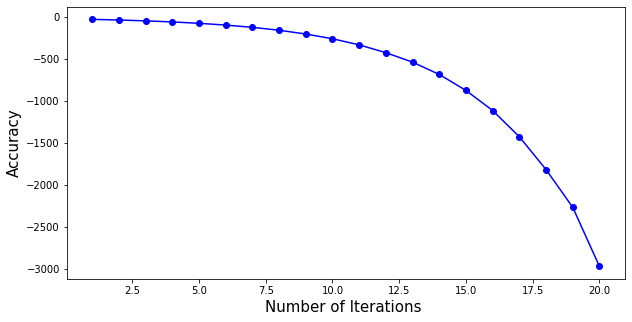

In [43]:
import matplotlib.pyplot as plt
#%matplotlib inline

learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1) #w = torch.ones(4).float()

lossJ = []
for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    print('J=', J)
    grad = (J_func((w + 1e-4), x, y) - J_func((w - 1e-4), x, y)) / (2 * 1e-4)
    lossJ.append(grad) #lossJ.append(float(grad))
    print('grad =',grad)
    w += (learning_rate * grad) #w += (learning_rate * grad * x)
    print('w =', w)

# Plote o gráfico da loss J pela iteração i
plt.figure(figsize=(10,5))
plt.plot(range(1, (iteracoes + 1)), lossJ, '-bo')
plt.xlabel('Number of Iterations ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

##Exercício 3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


i = 0
J= tensor(14., grad_fn=<SumBackward0>)
grad = tensor([-28.])
w = tensor([0.7200], requires_grad=True)
i = 1
J= tensor(22.9376, grad_fn=<SumBackward0>)
grad = tensor([-63.8400])
w = tensor([0.0816], requires_grad=True)
i = 2
J= tensor(51.5236, grad_fn=<SumBackward0>)
grad = tensor([-117.5552])
w = tensor([-1.0940], requires_grad=True)
i = 3
J= tensor(134.0155, grad_fn=<SumBackward0>)
grad = tensor([-204.1859])
w = tensor([-3.1358], requires_grad=True)
i = 4
J= tensor(369.2717, grad_fn=<SumBackward0>)
grad = tensor([-347.9885])
w = tensor([-6.6157], requires_grad=True)
i = 5
J= tensor(1039.2229, grad_fn=<SumBackward0>)
grad = tensor([-589.2280])
w = tensor([-12.5080], requires_grad=True)
i = 6
J= tensor(2946.7388, grad_fn=<SumBackward0>)
grad = tensor([-995.4514])
w = tensor([-22.4625], requires_grad=True)
i = 7
J= tensor(8377.7871, grad_fn=<SumBackward0>)
grad = tensor([-1680.4011])
w = tensor([-39.2665], requires_grad=True)
i = 8
J= tensor(23840.9395, grad_fn=<SumBackward0>)
grad

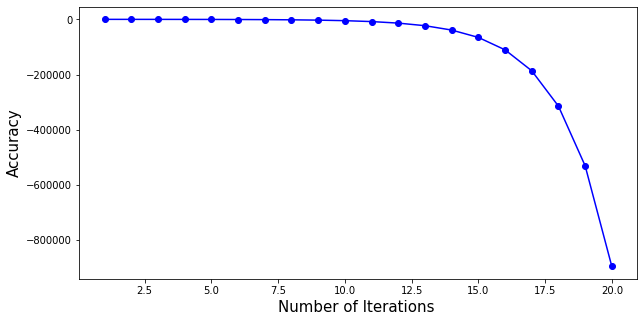

In [44]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)

lossJ = []
for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    print('J=', J)
    J.backward()
    grad = w.grad.clone()
    lossJ.append(grad)
    print('grad =',grad)
    w.data += (learning_rate * grad)
    print('w =', w)

# Plote aqui a loss pela iteração
plt.figure(figsize=(10,5))
plt.plot(range(1, (iteracoes + 1)), lossJ, '-bo')
plt.xlabel('Number of Iterations ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

##Exercício 4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

Resposta:

A função $J$ é continua em todo domínio real ($\mathbb{R}$). Entretanto, observe que a proximação da derivada de $J$ com relação a $W$, $\frac{\partial J}{\partial w}$, dado pelo método de diferenças finitas, têm como denominador $2\Delta w$. Como a divisão por zero é *indefinida*, $\Delta w$ deve ser diferente de zero ($\Delta w\neq 0$)

##Exercício 5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a) Como o custo da função $J$ é $O(N)$, o custo computacional de calcular $\frac{\partial J}{\partial w}$, pelo método de diferenças finitas, é da mesma ordem de grandeza, pois a aproxímação de $\frac{\partial J}{\partial w}$ é dependente da função $J$. Isto é, o custo da apróximaçao é: $O(N) + O(N) = 2*O(N)$ que pode ser aproximada por $O(N)$.

b) Note que a rede neural utilizada contém apenas um único neurônio (um Perceptron) que não possuí função de ativação. Deseja-se obter o custo de apenas uma única iteração. Portanto, o custo do *backpropagation* é o custo de aplicar o calculo da derivada da função $J$. $\frac{\partial J}{\partial w} = 2x_{i}(wx_i - y)$. Como $W$ é uma matriz com $N$ parâmetros, o custo de calcular $\frac{\partial J}{\partial w}$ é $O(N)$.

##Exercício 6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

Resposta:

O exercício pede o custo do calculo de um exemplo. Note que apenas um exemplo requer a $K$ somas de $y_j * \log p_j$. Portato o custo computaconal de $L$ para um únicp exemplo é $O(k)$

## Fim do notebook